# 1-Qubit Gates: Decompositions, Identities, and Noise

## Objectives:
* Understand how to decompose 1-qubit gates into different gate sets
* Utilize different gate identities to transpile circuits
* Learn how noise effects the accuracy of results
* Run on a real machine!

## Gate Identities and Decomposition

In the lectures on 1-qubit gates, you were introduced to a number of different gates that commonly arise in quantum computing. Some of them, like the $X,Y,Z,$ and $H$ are very efficient for doing theoretical work with, but are potentially difficult to implement with real hardware. Others, like $R_X,R_Y,S$ are easier to implement on hardware, but aren't as nice for theoretical work.  Therefore it would be nice to know that regardless of what choice of gates we write our circuits in, they can be reasonably translated to a real machine. This is the purpose of <b>transpilers</b>.

Transpilers take quantum circuits written with a broad range of flexible gates, and then decomposes them using some gate set usable on the device.  In the lecture, we were introduce to one such prescription, <b>ZYZ decomposition</b>:

$U = e^{iα} R_z(θ_2) R_y(θ_1) R_z(θ_0)$

This prescription can be used to take any 1-qubit Unitary and decomposes it into at most 3 gates.  If your hardware had access to a different set of gates besides $R_X,R_Y,R_Z$, then this decomposition wouldn't necessarily help and others must be used.

Another function that most transpilers perform is to attempt to optimize the number of gates used in order to reduce noise.  For example: During decomposing a set of gates, a transpiler might come across the set of gates $H Z H$.  As you will learn, this is equivalent to a single $X$ gate.  If the hardware being used has access to the $X$ gate, the transpiler is likely to replace $HZH$ by $X$. If instead, you were to put an $X$ gate into code for use with hardware that has $H,Z$ but no $X$, the transpiler would do this replacement as part of its decomposition.

In this lab, you will undertake to "transpile" a few circuits, along the way learning some 1-qubit gate identities that are useful. As a first step, the table below defines all the gates we will consider:

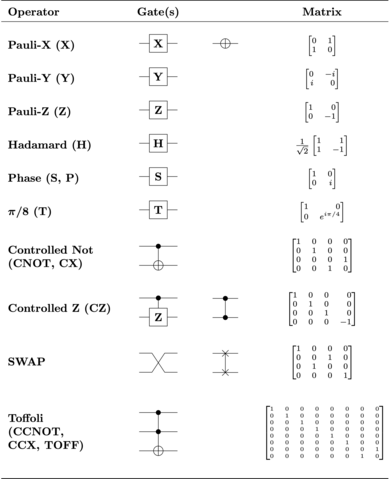

In addition to these, there is one other "gate" $\mathbb{1}=\begin{pmatrix}1 & 0\\0 & 1\end{pmatrix}$ which can be removed from any circuit, because it corresponds to leaving the qubit alone.

## 2 gate identities

For our first identities, you should try and compute the following circuits, and see which gate in the table they correspond to:

* $X X$

* $S S$

<b>Important: When written as a circuit the gates are matrices read from left to right, but as matrices you should multiply them in reverse order i.e. $A B$ the circuit is matrix $\hat{A}\times\hat{B}$</b>

========================

Answers:

$XX$= ????????????

$SS$= ????????????

========================

Hopefully you didn't find that too painful.  For the rest of this lab, you won't be asked to do any more matrix multiplication by hand.

From your calculations, you should have found that $X X=\mathbb{1}$ and $S S=Z$. From thing, you could conclude that if these arise in a circuit, the identities can be used to reduce the gate cost (total number of gates).

In the next cell, let's introduce python code that define these matrices for us, such that we can do the matrix multiplication numerically.

In [15]:
import numpy as np

X = np.matrix([[0,1],[1,0]])
Y = np.matrix([[0,-1j],[1j,0]])
Z = np.matrix([[1,0],[0,-1]])
H = (1/np.sqrt(2))*np.matrix([[1,1],[1,-1]])
S = np.matrix([[1,0],[0,1j]])
T = np.matrix([[1,0],[0,np.exp(1j*np.pi/4)]])

In python, the way to multiply to matrices $A,B$ to obtain a matrix $C$ is the syntax:

    C = A @ B
    
* Use this basic syntax to check that $ZZ$, $YY$, and $HH$ all equal $\mathbb{1}$ in the next cell.

In [14]:
print(Z @ Z)
print(Y @ Y)
print(H @ H)

[[1 0]
 [0 1]]
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
[[ 1.00000000e+00 -2.23711432e-17]
 [-2.23711432e-17  1.00000000e+00]]


* Using the same basic syntax, can you identify what $SS$ and $TT$ are equal to?

In [16]:
print(S @ S)
print(T @ T)

[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]
[[1.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 2.22044605e-16+1.j]]


There is one final two gate identity worth I would like to mention:  $TS=ST$ (unlikely the other ones, this is perhaps more suprising.  Can you come up with a mnemonic that would make it easy?  I have one.)

To summarize so far, we have the identities

$XX=YY=ZZ=HH=\mathbb{1}$

$SS=Z$,  $TT=S$

$TS=ST$

The usefulness of these relations is that one can string them together to simplfy much longer circuits. For example, if you were given the circuit $SXXZHHZXXT$, you could reduce it through the steps:
1. $HH=\mathbb{1}$, so $SXXZHHZXXT=SXXZZXXT$
2. $XX=ZZ=\mathbb{1}$, so $SXXZZXXT=ST=TS$

Using the identities, can you simplfy the following circuits?

====================================

$HXXH=$  I

$TSTS=$  SZ

$HSSZH=$ I

====================================

## 3 gate identities

In addition to the previous identities, there are also identities that can be used in this gate set to reduce 3 gates to 1.  But they introduce some interesting new tricks.

For 3 matrices, you can multiple them in python to yield a forth matrix by:

    D = A @ B @ C
    
*Using the python syntax, and comparing to the table of gates, <b>can you identify what $HZH$ simplifies to?</b>

*Same question for <b>$HXH$</b>?

In [19]:
print(H @ X @ H)

[[ 1.00000000e+00 -2.23711432e-17]
 [ 2.23711432e-17 -1.00000000e+00]]


Sometimes, identities don't quite return gates in the set, but return ones that are the same up to a global phase. But we know that in the case of single qubits, global phases aren't relevant and can be ignored.  For example, as far as a single qubit is concerned $-X=X$ (when we get to multi-qubits states, these phase factors can matter)

*Using the python code, <b>can you identify what gates (up to a minus sign) $HYH$ and $XYX$ equal?</b>

In [21]:
print(H @ Y @ H)
print(𝐻@𝑌@𝐻@𝑍@𝑆@𝑇@𝑆@𝐻@𝑋@𝐻@𝑇@𝑆@𝑋@𝑌@𝑋@𝐻@𝑍@𝐻)

[[0.-2.23711432e-17j 0.+1.00000000e+00j]
 [0.-1.00000000e+00j 0.+2.23711432e-17j]]
[[2.36158002e-17+6.73463194e-18j 1.00000000e+00-1.11022302e-16j]
 [1.00000000e+00-2.24978173e-34j 2.36158002e-17+1.07455189e-17j]]


All together, you should have found a number of useful identities:

$XX=YY=ZZ=HH=\mathbb{1}$

$SS=Z$,  $TT=S$

$TS=ST$

$HXH=Z$, $HZH=X$

$HYH=XYX=(-Y)$

Using these, try and reduce the following expressions:

$HXHZ=$ I

$XYXHYH=$ I

$XTSTZ=$ X

At this point, you feel confident and are ready for a challenge.  In order to make something that might be useful to test noise on modern hardware, its a bit of a long one.  But I believe in you!

*<b>Simplify the next cell</b>

==============================

Hank's wildly inefficient circuit:

$HYHZSTSHXHTSXYXHZH$

==============================

What did you find? Is there a substantially more efficient way to implement this circuit?

While this example may have felt artificial, this procedure is a part of the standard quantum computing toolkit.  For us, every circuit gate is expensive.  But at the same time, it can be hard to see the smartest implementation at the beginning.  For this reason, it is common to first write out any circuit that will correctly implement the desired algorithm, and only then try to optimize.  Pithily stated:

<i>Premature optimization is the root of all evil</i>

In the afternoon, we will see how good and bad decompositions can affect the noise, and even limit what calculations are possible.